In [1]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)

# Using All Weather Variables

In [3]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'dewPointC', 'windGustKmph']]

In [4]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Bayesian Ridge Regression using train_test_split

In [5]:
# Create linear regression object with a ridge coefficient 0.5
b_ridge = BayesianRidge()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Train the model using the training sets
b_ridge.fit(X_train,Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [6]:
p = b_ridge.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score 0.826849794595
RMSE 0.0275376949767


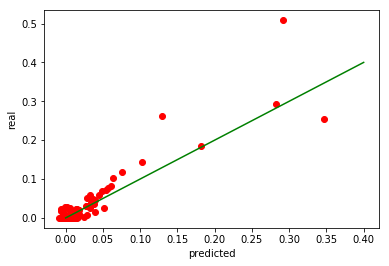

In [7]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# pl.savefig('wwo_model_results/bayesridge_all_scatterplot.png')

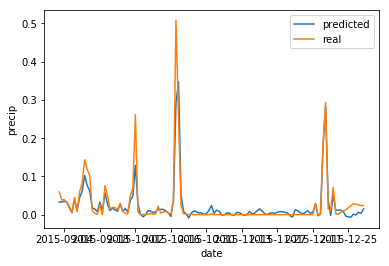

In [8]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

# pl.savefig('wwo_model_results/bayesridge_all_linegraph.png')

## Bayes Ridge Regression using 10-fold cross validation

In [9]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    b_ridge.fit(x_train, y_train)
    p = b_ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [10]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Ridge Regression
R2 score on training: 0.826850
RMSE on training: 0.027538
RMSE on 10-fold CV: 0.020543
